\begin{center}
\large{\textbf{UNIVERZITET U BEOGRADU}}\\
[0.26cm]
\textsc\huge{\textbf{ELEKTROTEHNIČKI FAKULTET}}\\
[2cm]
\line(1,0){300}\\
[0.25in]
\LARGE\bfseries{Veštačka Inteligencija}\\
[2mm]
\huge\bfseries{PRVI DOMAĆI}\\
[2mm]
\line(1,0){200}\\
[1.5cm]
\textsc\LARGE{Marko Macura}\\
\LARGE{0261/2018}\\
[7cm]
\textsc{\large{Beograd}}
\end{center}

# Simulirano kaljenje

Kao metod za generisanje novih odbiraka sam koristio:
$$x' = x + random(-0.5, 0.5)$$
gde $random(-0.5, 0.5)$ vraća nasumičan broj između -0.5 i 0.5. Ukoliko $x'$ izađe iz domena, onda mu određene komponente fiksiram na 0 ili 2.

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
def func(x: np.array) -> float:
    """
    

    Parameters
    ----------
    x : np.array
        Ulaz u funkciju.

    Returns
    -------
    float
        Izlaz funkcije koju treba minimizovati.

    """
    if x.size != 3:
        return 1000000
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    return 4*(x1*x1 + x2*x2 - x1*x2)**(0.75)/3 + x3

Ova metoda vraća vrednost funkcije u vektoru x.

In [3]:
def sk(x: np.array, T: np.array, Mk: int) -> tuple:
    """
    

    Parameters
    ----------
    x : np.array
        Pocetno stanje.
    T : np.array
        Raspored temperatura.
    Mk : int
        Broj iteracija za svaku temperaturu.

    Returns
    -------
    Niz najboljih resenja i niz trenutnih resenja.

    """
    output = x
    foutput = []
    fx = []
    k = 0
    while k<=T.size and T[k]!=0:
        for m in range(Mk):
            razlika = (np.random.rand(1, 3)[0]- 0.5)
            x1 = x + razlika
            x1[x1<0] = 0
            x1[x1>2] = 2
            delta = func(x1) - func(x)
            if func(x1) < func(output):
                output = x1
            if delta <= 0:
                x = x1
            else:
                if random.random() <= math.exp(-delta/T[k]):
                    x = x1
            fx = fx + [func(x)]
            foutput = foutput + [func(output)]
        k = k+1
    return output, x, foutput, fx

Ova funkcija radi simulirano kaljenje. 

Text(0, 0.5, 'izlaz funkcije')

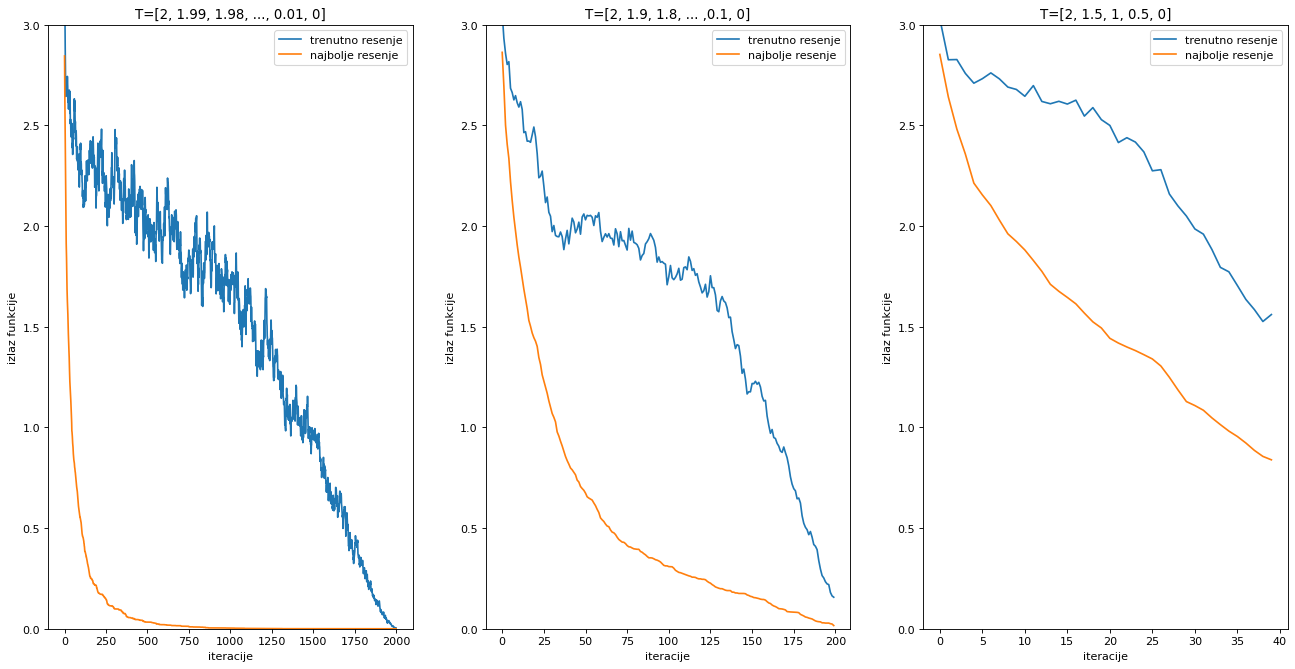

In [4]:
T1 = np.arange(201)/100
T1 = np.flip(T1)

T2 = np.arange(21)/10
T2 = np.flip(T2)

T3 = np.array([2, 1.5, 1, 0.5, 0])
M = 10
foutput1 = np.zeros((T1.size-1)*M)
foutput2 = np.zeros((T2.size-1)*M)
foutput3 = np.zeros((T3.size-1)*M)

fx1 = np.zeros((T1.size-1)*M)
fx2 = np.zeros((T2.size-1)*M)
fx3 = np.zeros((T3.size-1)*M)

for i in range(100):
    x = np.random.rand(1, 3)[0]*2
    _, _, fo1, fiks1 = sk(x, T1, M)
    _, _, fo2, fiks2 = sk(x, T2, M)
    _, _, fo3, fiks3 = sk(x, T3, M)
    foutput1 = foutput1 + np.array(fo1)
    foutput2 = foutput2 + np.array(fo2)
    foutput3 = foutput3 + np.array(fo3)
    
    fx1 = fx1 + fiks1
    fx2 = fx2 + fiks2
    fx3 = fx3 + fiks3
    
foutput1 = foutput1/100
foutput2 = foutput2/100
foutput3 = foutput3/100

fx1 = fx1/100
fx2 = fx2/100
fx3 = fx3/100

fig, ax = plt.subplots(1, 3, figsize=(20,10), dpi=80);
t1 = np.arange(foutput1.size)
ax[0].plot(t1, fx1, t1, foutput1)
ax[0].set_title('T=[2, 1.99, 1.98, ..., 0.01, 0]')
ax[0].legend(['trenutno resenje', 'najbolje resenje'])
ax[0].set_ylim(0, 3)
ax[0].set_xlabel('iteracije')
ax[0].set_ylabel('izlaz funkcije')

t2 = np.arange(foutput2.size)
ax[1].plot(t2, fx2, t2, foutput2)
ax[1].set_title('T=[2, 1.9, 1.8, ... ,0.1, 0]')
ax[1].legend(['trenutno resenje', 'najbolje resenje'])
ax[1].set_ylim(0, 3)
ax[1].set_xlabel('iteracije')
ax[1].set_ylabel('izlaz funkcije')

t3 = np.arange(foutput3.size)
ax[2].plot(t3, fx3, t3, foutput3)
ax[2].set_title('T=[2, 1.5, 1, 0.5, 0]')
ax[2].legend(['trenutno resenje', 'najbolje resenje'])
ax[2].set_ylim(0, 3)
ax[2].set_xlabel('iteracije')
ax[2].set_ylabel('izlaz funkcije')

Ovo su grafici kako se menja trenutno i najbolje rešenje u zavisnosti od iteracija. Svaka temperatura traje po 5 iteracija. Kao što vidimo prvi grafik sporije konvergira (treba mu oko 750 iteracija) i on je u suštini sličan slučajnoj pretrazi jer temperaturu sporo spušta. Što se tiče poslednjeg grafika on je sličan algoritmu penjanja uzbrdo, jer mu temperatura brzo opadne. Kada temperatura prebrzo opada, onda imamo i mali broj iteracija i algoritam ne stigne da iskonvergira. I kao najbolje rešenje je drugi grafik koji konvergira u nulu i daje dobre rezultate i radi kao što bi simulirano kaljenje i trebalo da radi.

Text(0, 0.5, 'temperatura')

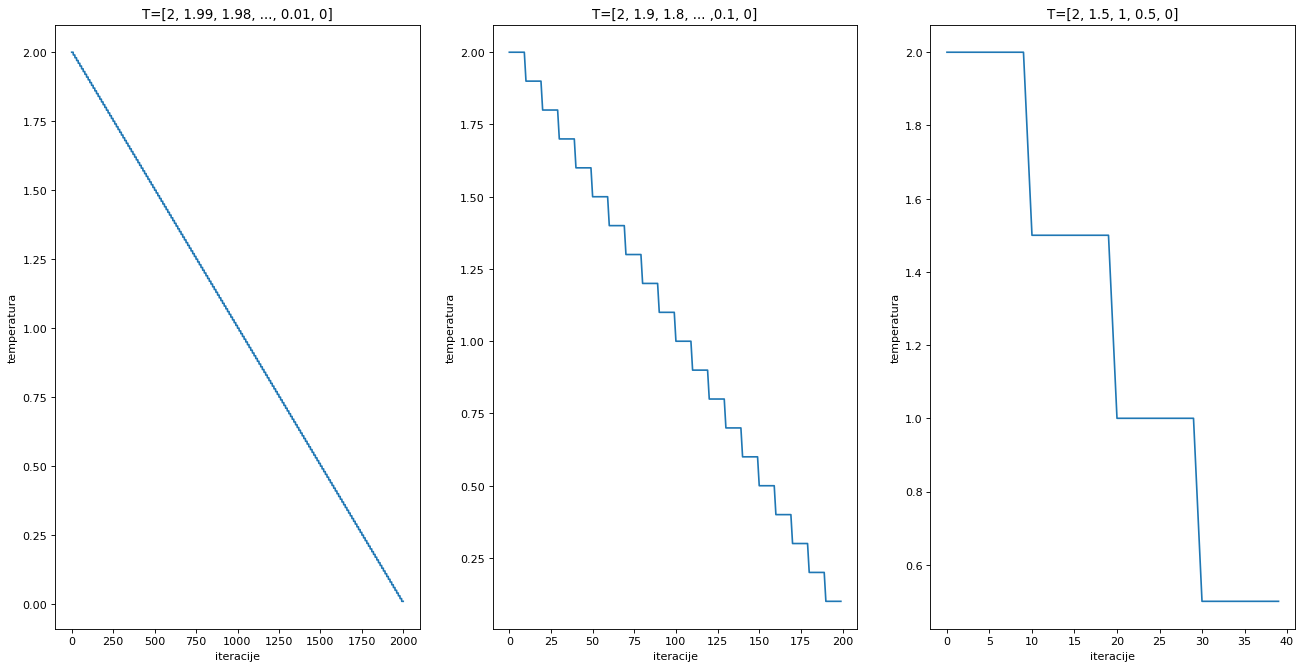

In [5]:
T1 = np.repeat(T1, M)[:-M]
T2 = np.repeat(T2, M)[:-M]
T3 = np.repeat(T3, M)[:-M]
fig, ax = plt.subplots(1, 3, figsize=(20,10), dpi=80);
t1 = np.arange(foutput1.size)
ax[0].plot(t1, T1)
ax[0].set_title('T=[2, 1.99, 1.98, ..., 0.01, 0]')
ax[0].set_xlabel('iteracije')
ax[0].set_ylabel('temperatura')

t2 = np.arange(foutput2.size)
ax[1].plot(t2, T2)
ax[1].set_title('T=[2, 1.9, 1.8, ... ,0.1, 0]')
ax[1].set_xlabel('iteracije')
ax[1].set_ylabel('temperatura')

t3 = np.arange(foutput3.size)
ax[2].plot(t3, T3)
ax[2].set_title('T=[2, 1.5, 1, 0.5, 0]')
ax[2].set_xlabel('iteracije')
ax[2].set_ylabel('temperatura')

Ovi grafici predstavljaju promenu temperature kroz iteracije za sva tri slučaja.

# Pretraga po snopu

Kada je pretraga po snopu u pitanju, prvo ću generisati $bd$ rešenja i izabrati $naj$ najboljih (pogledati algoritam). Onda ću od njih generisati još po $bd$ rešenja koristeći formulu:
$$ x' = x + random(-0.1, 0.1)$$
Ukoliko $x'$ ispadne iz domena, onda ga mu određene komponente fiksiram na 0 ili 2.

In [6]:
def pps(bd: int, naj: int) -> tuple:
    """
    
    
    
     Parameters
    ----------
    bd : int
        Broj dece.
    naj : int
        Biranje naj najboljih.

    Returns
    -------
    tuple
        Pretraga po snopu.

    """
    x = np.random.rand(bd, 3)*2
    najbolje = 10000
    najbolje_x = x[0, :]
    najbolje1 = 100000
    prosecni = []
    lista_najboljih = []
    while najbolje < najbolje1:
        najbolje1 = najbolje
        naj_deca = list(x)
        naj_deca = sorted(naj_deca, key=func)
        p = 0
        for i in naj_deca:
            p = p + func(i) 
        naj_deca = naj_deca[0:naj]
        prosecni = prosecni + [p*3/x.size]
        x = np.array([])
        for i in naj_deca:
            x1 = i + np.random.rand(bd, 3)*0.2-0.1
            x1[x1<0] = 0
            x1[x1>2] = 2
            if x.size == 0:
                x = x1
            else:
                x = np.append(x, x1, axis=0)
            if najbolje > func(i):
                najbolje = func(i)
                najbolje_x = i
        lista_najboljih = lista_najboljih + [najbolje]
    return lista_najboljih, prosecni

Funkciji za pretragu po snopu sam prosledio dva parametra. Prvi argument je broj dece koji se generiše jedan od čvorova u jednoj iteraciji, a drugi argument je koliko najboljih čvorova zadržava algoritam. Algoritam ponavljam sve dok se najbolje rešenje ne ponovi dva puta. To je znak da je algoritam na minimumu. Izlaz funkcije je tuple od liste najboljih i liste prosečnih u svakoj iteraciji.

Text(0, 0.5, 'izlaz funkcije')

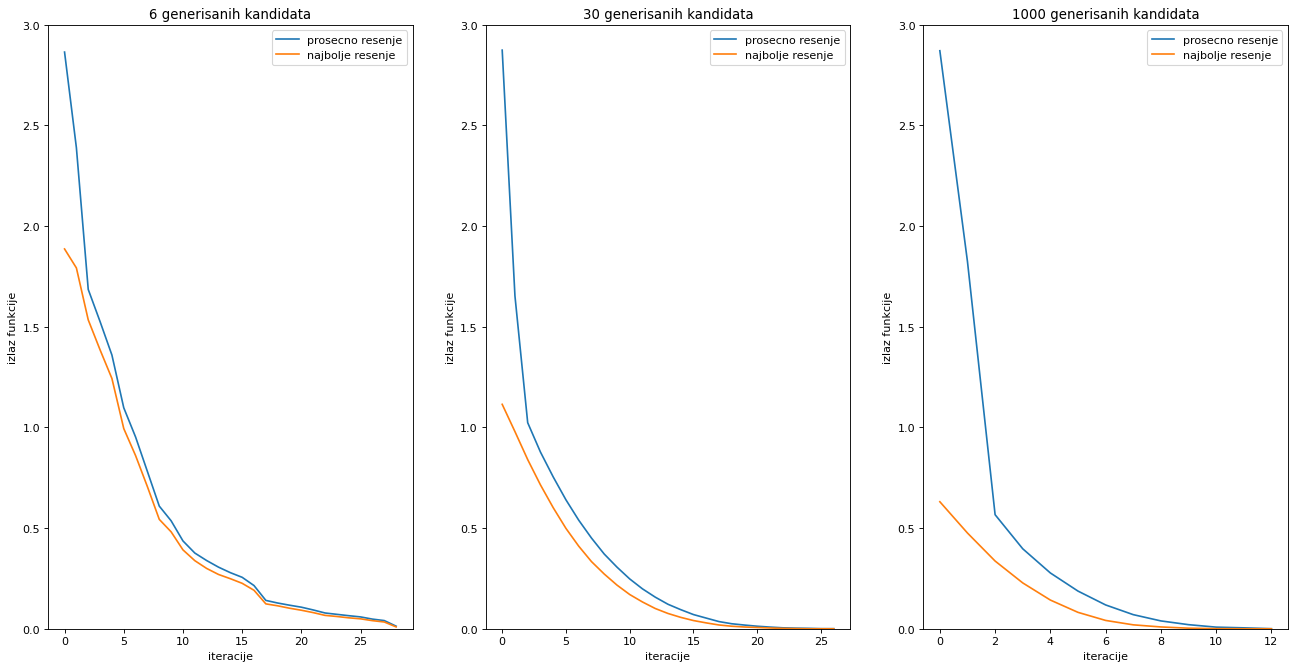

In [7]:
najbolji = np.array([])
prosecni = np.array([])
for i in range(100):
    l_n, pr = pps(3, 2)
    if najbolji.size == 0:
        najbolji = np.array(l_n)
        prosecni = np.array(pr)
    else:
        if najbolji.size < len(l_n):
            while najbolji.size != len(l_n):
                najbolji = np.append(najbolji, 0)
                prosecni = np.append(prosecni, 0)
        for j in range(len(l_n)):
            najbolji[j] = najbolji[j]+l_n[j]
            prosecni[j] = prosecni[j]+pr[j]
najbolji = najbolji/100
prosecni = prosecni/100

fig, ax = plt.subplots(1, 3, figsize=(20,10), dpi=80);
t1 = np.arange(najbolji.size)
ax[0].plot(t1, prosecni, t1, najbolji)
ax[0].set_title('6 generisanih kandidata')
ax[0].legend(['prosecno resenje', 'najbolje resenje'])
ax[0].set_ylim(0, 3)
ax[0].set_xlabel('iteracije')
ax[0].set_ylabel('izlaz funkcije')

najbolji = np.array([])
prosecni = np.array([])
for i in range(100):
    l_n, pr = pps(10, 3)
    if najbolji.size == 0:
        najbolji = np.array(l_n)
        prosecni = np.array(pr)
    else:
        if najbolji.size < len(l_n):
            while najbolji.size != len(l_n):
                najbolji = np.append(najbolji, 0)
                prosecni = np.append(prosecni, 0)
        for j in range(len(l_n)):
            najbolji[j] = najbolji[j]+l_n[j]
            prosecni[j] = prosecni[j]+pr[j]
najbolji = najbolji/100
prosecni = prosecni/100

t1 = np.arange(najbolji.size)
ax[1].plot(t1, prosecni, t1, najbolji)
ax[1].set_title('30 generisanih kandidata')
ax[1].legend(['prosecno resenje', 'najbolje resenje'])
ax[1].set_ylim(0, 3)
ax[1].set_xlabel('iteracije')
ax[1].set_ylabel('izlaz funkcije')

najbolji = np.array([])
prosecni = np.array([])
for i in range(100):
    l_n, pr = pps(50, 20)
    if najbolji.size == 0:
        najbolji = np.array(l_n)
        prosecni = np.array(pr)
    else:
        if najbolji.size < len(l_n):
            while najbolji.size != len(l_n):
                najbolji = np.append(najbolji, 0)
                prosecni = np.append(prosecni, 0)
        for j in range(len(l_n)):
            najbolji[j] = najbolji[j]+l_n[j]
            prosecni[j] = prosecni[j]+pr[j]
najbolji = najbolji/100
prosecni = prosecni/100

t1 = np.arange(najbolji.size)
ax[2].plot(t1, prosecni, t1, najbolji)
ax[2].set_title('1000 generisanih kandidata')
ax[2].legend(['prosecno resenje', 'najbolje resenje'])
ax[2].set_ylim(0, 3)
ax[2].set_xlabel('iteracije')
ax[2].set_ylabel('izlaz funkcije')


Rezultati kada generišem 6 kandidata su dobri tek nakon 35 iteracija. Međutim pošto sam radio tako da kada se ne promeni najbolji rezultat onda stajem sa radom, u mnogo slučajeva je algoritam stao posle nekoliko iteracija i sa netačnim rešenjem (zato grafik ima nagle padove, jer za slučajeve kada stane npr. na petoj iteraciji onda sam stavljao 0 sve do 35 iteracije, što znatno spušta prosek). To je problem kada se generiše malo novih kandidata, jer je onda veća verovatnoća da svi novogenerisani kandidati budu lošiji od starog čvora. Zbog toga je bitno izabrati veći broj generisanih kandidata. A ukoliko je broj kandidata koje posmatramo previše mali onda algoritam praktično postaje gramziva pretraga. Zbog toga je bitno staviti veći broj kandidata koje posmatramo. 
Na drugom grafiku vidimo bolje rezultate. Već posle 25 iteracija dolazimo sigurno do rešenja i to su po mom mišljenju optimalni parametri za pretragu po snopu.
Na poslednjem grafiku nailazimo naizgled na najbolje rezultate, jer već posle 12 iteracija dolazimo do rešenja. Kako imamo ogroman broj generisanih kandidata, ova pretraga je najsličnija pretrazi po širini. Ova pretraga je sporija u odnosu na prve dve i zahteva veće memorijsko zauzeće. Zbog toga treba težiti ka manjim vrednostima parametara.

# Genetski algoritam